## Script 7, Saloni Khandelwal
## Targeted Sentiment Identification

In [ ]:
import sklearn
import pandas as pd

import wordcloud
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import metrics
import numpy as np

import eli5

In [ ]:
import nltk
from gensim import corpora
from gensim.models import LdaModel
from nltk.util import ngrams

In [ ]:
df = pd.read_parquet('sentiment_filtered_news.parquet')
df.head()

,url,date,language,title,text,cleaned_text,important_words,tokens,topic,predicted_sentiment_yelp_new,sentiment_numeric
0,http://en.people.cn/n3/2021/0318/c90000-983012...,2021-03-18,en,Artificial intelligence improves parking effic...,\n\nArtificial intelligence improves parking e...,Some urban areas of the city started to use ET...,urban areas city started use etc system roadsi...,"[urban, areas, city, started, use, etc, system...",0,p,1
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,Children With Autism Saw Their Learning and So...,children autism saw learning social skills boo...,"[children, autism, saw, learning, social, skil...",1,n,-1
2,http://www.dataweek.co.za/12835r,2021-03-26,en,"Forget ML, AI and Industry 4.0 – obsolescence ...","\n\nForget ML, AI and Industry 4.0 – obsolesce...",The world entered a new era of accelerated tra...,world entered new era accelerated transformati...,"[world, entered, new, era, accelerated, transf...",0,p,1
3,http://www.homeoffice.consumerelectronicsnet.c...,2021-03-10,en,Strategy Analytics: 71% of Smartphones Sold Gl...,\n\nStrategy Analytics: 71% of Smartphones Sol...,AI is used in various functions inside smartph...,ai used various functions inside smartphones i...,"[ai, used, various, functions, inside, smartph...",0,p,1
4,http://www.itbusinessnet.com/2020/10/olympus-t...,2020-10-20,en,Olympus to Support Endoscopic AI Diagnosis Edu...,\n\nOlympus to Support Endoscopic AI Diagnosis...,"In collaboration with CYBERNET SYSTEMS CO,. LT...",collaboration cybernet systems co ltd olympus ...,"[collaboration, cybernet, systems, co, ltd, ol...",0,p,1


#### Sentiment Distirbution

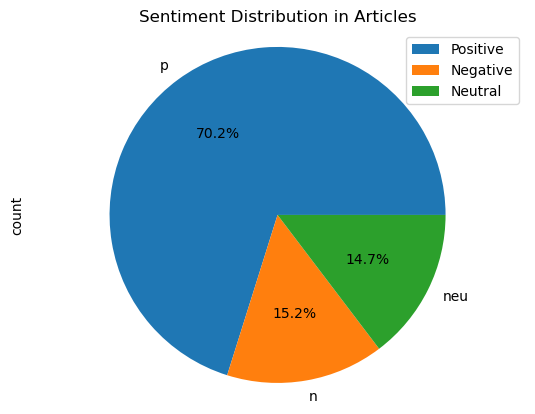

In [ ]:
sentiment_counts = df['predicted_sentiment_yelp_new'].value_counts()
sentiment_counts.plot(kind='pie', autopct='%1.1f%%')

ax = plt.gca()

labels = ['Positive', 'Negative', 'Neutral']
ax.legend(labels, loc='upper right')

plt.title('Sentiment Distribution in Articles')
plt.axis('equal')

plt.show()

### Positive LDA

In [ ]:
df['important_words'] = df['important_words'].str.lower()
df['tokens'] = df['important_words'].apply(nltk.word_tokenize)

In [ ]:
df['ngrams'] = df['tokens'].apply(lambda tokens: list(ngrams(tokens, 2)))

In [ ]:
df['ngrams'] = df['ngrams'].apply(lambda ngrams: [' '.join(gram) for gram in ngrams])

In [ ]:
positive_data = df[df['predicted_sentiment_yelp_new'] == 'p']['ngrams']
negative_data = df[df['predicted_sentiment_yelp_new'] == 'n']['ngrams']
neutral_data = df[df['predicted_sentiment_yelp_new'] == 'neu']['ngrams']

In [ ]:
dictionary = corpora.Dictionary(positive_data)

In [ ]:
corpus = [dictionary.doc2bow(tokens) for tokens in positive_data]
num_topics = 7

In [ ]:
lda_model_positive_use = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)

In [ ]:
for topic_id, topic_words in lda_model_positive_use.show_topics(num_topics=num_topics):
    print(f"Topic ID: {topic_id}")
    print(f"Keywords: {topic_words}")
    print()

Topic ID: 0
Keywords: 0.011*"machine learning" + 0.005*"artificial intelligence" + 0.005*"data science" + 0.002*"computer vision" + 0.002*"data scientists" + 0.002*"big data" + 0.002*"data analytics" + 0.002*"deep learning" + 0.002*"digital transformation" + 0.001*"ai models"

Topic ID: 1
Keywords: 0.006*"artificial intelligence" + 0.002*"breaking news" + 0.002*"per cent" + 0.001*"ai technology" + 0.001*"use ai" + 0.001*"news alerts" + 0.001*"customer service" + 0.001*"last year" + 0.001*"newsletters breaking" + 0.001*"commentary newsletters"

Topic ID: 2
Keywords: 0.008*"artificial intelligence" + 0.003*"machine learning" + 0.002*"ai systems" + 0.002*"privacy policy" + 0.002*"can not" + 0.001*"facial recognition" + 0.001*"use ai" + 0.001*"ai system" + 0.001*"deep learning" + 0.001*"neural network"

Topic ID: 3
Keywords: 0.013*"artificial intelligence" + 0.008*"intelligence ai" + 0.003*"forwardlooking statements" + 0.002*"global artificial" + 0.002*"market research" + 0.001*"market rep

#### Topic ID: 0: AI
Keywords: 0.011*"machine learning" + 0.005*"artificial intelligence" + 0.005*"data science" + 0.002*"computer vision" + 0.002*"data scientists" + 0.002*"big data" + 0.002*"data analytics" + 0.002*"deep learning" + 0.002*"digital transformation" + 0.001*"ai models"

Topic ID: 1
Keywords: 0.006*"artificial intelligence" + 0.002*"breaking news" + 0.002*"per cent" + 0.001*"ai technology" + 0.001*"use ai" + 0.001*"news alerts" + 0.001*"customer service" + 0.001*"last year" + 0.001*"newsletters breaking" + 0.001*"commentary newsletters"

#### Topic ID: 2 Deep Learning, AI Techniques
Keywords: 0.008*"artificial intelligence" + 0.003*"machine learning" + 0.002*"ai systems" + 0.002*"privacy policy" + 0.002*"can not" + 0.001*"facial recognition" + 0.001*"use ai" + 0.001*"ai system" + 0.001*"deep learning" + 0.001*"neural network"

#### Topic ID: 3 AI in Market
Keywords: 0.013*"artificial intelligence" + 0.008*"intelligence ai" + 0.003*"forwardlooking statements" + 0.002*"global artificial" + 0.002*"market research" + 0.001*"market report" + 0.001*"market share" + 0.001*"ai market" + 0.001*"market size" + 0.001*"actual results"

#### Topic ID: 4 LLMs, AI tools
Keywords: 0.004*"generative ai" + 0.002*"artificial intelligence" + 0.002*"opens new" + 0.002*"new tab" + 0.002*"social media" + 0.001*"search engine" + 0.001*"hours ago" + 0.001*"language models" + 0.001*"new york" + 0.001*"ai tools"

#### Topic ID: 5 Research?
Keywords: 0.007*"dollar trades" + 0.006*"machine learning" + 0.004*"renalytix ai" + 0.004*"artificial intelligence" + 0.003*"matrix ai" + 0.003*"ai network" + 0.003*"decentralized machine" + 0.002*"vectorspace ai" + 0.002*"lisk machine" + 0.002*"lower dollar"

#### Topic ID: 6 Insurance
Keywords: 0.004*"online quotes" + 0.003*"insurance companies" + 0.003*"car insurance" + 0.002*"insurance quotes" + 0.002*"ein presswire" + 0.002*"email newsletters" + 0.002*"news search" + 0.002*"rss email" + 0.001*"contact log" + 0.001*"365 days"

In [ ]:
corpus = [dictionary.doc2bow(tokens) for tokens in positive_data]
num_topics = 10

In [ ]:
lda_model_positive = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)

In [ ]:
for topic_id, topic_words in lda_model_positive.show_topics(num_topics=num_topics):
    print(f"Topic ID: {topic_id}")
    print(f"Keywords: {topic_words}")
    print()

#### Topic ID: 0, AI, ML, Big Data
Keywords: 0.014*"machine learning" + 0.006*"artificial intelligence" + 0.005*"data science" + 0.002*"computer vision" + 0.002*"big data" + 0.002*"data scientists" + 0.002*"deep learning" + 0.002*"data analytics" + 0.002*"digital transformation" + 0.002*"intelligence ai"


#### Topic ID: 1 Social Media, Generative AI
Keywords: 0.011*"artificial intelligence" + 0.003*"generative ai" + 0.002*"social media" + 0.002*"use ai" + 0.002*"machine learning" + 0.002*"ai systems" + 0.002*"using ai" + 0.002*"privacy policy" + 0.002*"can not" + 0.002*"ai models"


#### Topic ID: 2  ????
Keywords: 0.001*"patch notes" + 0.001*"sales charts" + 0.001*"calculator patch" + 0.001*"charts calculator" + 0.001*"instant search" + 0.001*"browser extension" + 0.001*"ai products" + 0.001*"image generated" + 0.001*"search next" + 0.001*"artificial intelligence"


#### Topic ID: 3 AI in Market Analysis
Keywords: 0.017*"artificial intelligence" + 0.010*"intelligence ai" + 0.003*"global artificial" + 0.002*"market report" + 0.002*"market research" + 0.001*"market share" + 0.001*"majority leader" + 0.001*"ai market" + 0.001*"schumer dny" + 0.001*"newsletters may"


#### Topic ID: 4: AI In Finance (blockchain, financial services)
Keywords: 0.008*"matrix ai" + 0.008*"ai network" + 0.002*"let us" + 0.002*"new york" + 0.002*"hours ago" + 0.002*"state union" + 0.002*"motley fool" + 0.001*"search please" + 0.001*"search term" + 0.001*"enter search"


#### Topic ID: 5 Healthcare ???
Keywords: 0.009*"dollar trades" + 0.007*"machine learning" + 0.006*"renalytix ai" + 0.005*"artificial intelligence" + 0.003*"decentralized machine" + 0.003*"vectorspace ai" + 0.003*"lisk machine" + 0.003*"lower dollar" + 0.003*"companys stock" + 0.002*"terms use"


#### Topic ID: 6 AI with media (social media, face recognition)
Keywords: 0.005*"opens new" + 0.005*"new tab" + 0.003*"clearview ai" + 0.002*"may earn" + 0.002*"affiliate commission" + 0.002*"earn affiliate" + 0.002*"privacy policy" + 0.002*"site may" + 0.002*"social media" + 0.001*"venturebeat community"


#### Topic ID: 7 AI in Insurance
Keywords: 0.006*"online quotes" + 0.005*"car insurance" + 0.005*"insurance companies" + 0.003*"insurance quotes" + 0.002*"selfdriving cars" + 0.002*"anywhere time" + 0.002*"accurate real" + 0.002*"get quotes" + 0.002*"real info" + 0.002*"quotes insurance"


#### Topic ID: 8  NA: Do not include
Keywords: 0.003*"edit article" + 0.003*"permission edit" + 0.002*"ad choices" + 0.002*"life world" + 0.002*"top 10" + 0.002*"advertising ad" + 0.002*"news sell" + 0.002*"choices sell" + 0.002*"cookies choices" + 0.002*"preferences life"


#### Topic ID: 9 NA: Do not include
Keywords: 0.003*"cookie set" + 0.003*"cookie used" + 0.002*"use cookies" + 0.002*"website cookies" + 0.002*"user consent" + 0.002*"facebook timeline" + 0.002*"cookie consent" + 0.002*"automatically post" + 0.002*"posted mailonline" + 0.002*"gdpr cookie"


### Negative LDA

In [ ]:
dictionary2 = corpora.Dictionary(negative_data)

In [ ]:
corpus2 = [dictionary2.doc2bow(tokens) for tokens in negative_data]
num_topics = 7

In [ ]:
lda_model_neg_use = LdaModel(corpus=corpus2, id2word=dictionary2, num_topics=num_topics, random_state=42)

In [ ]:
for topic_id, topic_words in lda_model_neg_use.show_topics(num_topics=num_topics):
    print(f"Topic ID: {topic_id}")
    print(f"Keywords: {topic_words}")
    print()

Topic ID: 0
Keywords: 0.003*"search engine" + 0.002*"artificial intelligence" + 0.002*"generative ai" + 0.001*"bing search" + 0.001*"language model" + 0.001*"ai chatbot" + 0.001*"language models" + 0.001*"new bing" + 0.001*"ai technology" + 0.001*"large language"

Topic ID: 1
Keywords: 0.001*"artificial intelligence" + 0.001*"associated press" + 0.001*"hottest news" + 0.001*"personal information" + 0.001*"former president" + 0.001*"already subscribed" + 0.001*"ai said" + 0.001*"research product" + 0.001*"openais research" + 0.001*"safety teams"

Topic ID: 2
Keywords: 0.003*"artificial intelligence" + 0.002*"icon icon" + 0.002*"user profile" + 0.002*"often indicates" + 0.002*"indicates user" + 0.002*"icon shape" + 0.002*"letter f" + 0.002*"head shoulders" + 0.002*"account icon" + 0.002*"shoulders often"

Topic ID: 3
Keywords: 0.003*"email address" + 0.002*"high school" + 0.001*"reset password" + 0.001*"richland county" + 0.001*"1x week" + 0.001*"delivered 1x" + 0.001*"artificial intelli

#### Topic ID: 0: AI, LLMs
Keywords: 0.003*"search engine" + 0.002*"artificial intelligence" + 0.002*"generative ai" + 0.001*"bing search" + 0.001*"language model" + 0.001*"ai chatbot" + 0.001*"language models" + 0.001*"new bing" + 0.001*"ai technology" + 0.001*"large language"

#### Topic ID: 1 News
Keywords: 0.001*"artificial intelligence" + 0.001*"associated press" + 0.001*"hottest news" + 0.001*"personal information" + 0.001*"former president" + 0.001*"already subscribed" + 0.001*"ai said" + 0.001*"research product" + 0.001*"openais research" + 0.001*"safety teams"

Topic ID: 2
Keywords: 0.003*"artificial intelligence" + 0.002*"icon icon" + 0.002*"user profile" + 0.002*"often indicates" + 0.002*"indicates user" + 0.002*"icon shape" + 0.002*"letter f" + 0.002*"head shoulders" + 0.002*"account icon" + 0.002*"shoulders often"

#### Topic ID: 3 School
Keywords: 0.003*"email address" + 0.002*"high school" + 0.001*"reset password" + 0.001*"richland county" + 0.001*"1x week" + 0.001*"delivered 1x" + 0.001*"artificial intelligence" + 0.001*"sent email" + 0.001*"school sports" + 0.001*"credit card"

#### Topic ID: 4 Effect on Economy and Politics
Keywords: 0.003*"artificial intelligence" + 0.001*"economic forum" + 0.001*"world economic" + 0.001*"email address" + 0.001*"new york" + 0.001*"privacy policy" + 0.001*"associated press" + 0.001*"ai systems" + 0.001*"facebook twitter" + 0.001*"website cookies"

#### Topic ID: 5 Social Media, LLM
Keywords: 0.006*"artificial intelligence" + 0.002*"ai chatbot" + 0.002*"generative ai" + 0.002*"privacy policy" + 0.002*"elon musk" + 0.002*"social media" + 0.001*"search engine" + 0.001*"new york" + 0.001*"large language" + 0.001*"password email"

Topic ID: 6
Keywords: 0.004*"email address" + 0.002*"artificial intelligence" + 0.002*"reset password" + 0.002*"new york" + 0.001*"facebook twitter" + 0.001*"edit article" + 0.001*"forgot password" + 0.001*"credit card" + 0.001*"sent email" + 0.001*"password confirm"

In [ ]:
corpus2 = [dictionary2.doc2bow(tokens) for tokens in negative_data]
num_topics = 10

In [ ]:
lda_model_neg = LdaModel(corpus=corpus2, id2word=dictionary2, num_topics=num_topics, random_state=42)

In [ ]:
for topic_id, topic_words in lda_model_neg.show_topics(num_topics=num_topics):
    print(f"Topic ID: {topic_id}")
    print(f"Keywords: {topic_words}")
    print()

Topic ID: 0
Keywords: 0.003*"search engine" + 0.002*"artificial intelligence" + 0.002*"new bing" + 0.002*"generative ai" + 0.001*"bing search" + 0.001*"27 2023" + 0.001*"ai technology" + 0.001*"said new" + 0.001*"satya nadella" + 0.001*"new ai"

Topic ID: 1
Keywords: 0.002*"artificial intelligence" + 0.001*"watchdog said" + 0.001*"personal information" + 0.001*"computer screen" + 0.001*"mobile phone" + 0.001*"seen mobile" + 0.001*"2023 boston" + 0.001*"phone front" + 0.001*"front computer" + 0.001*"file openai"

Topic ID: 2
Keywords: 0.002*"search engine" + 0.001*"associated press" + 0.001*"artificial intelligence" + 0.001*"please enter" + 0.001*"search term" + 0.001*"enter search" + 0.001*"search please" + 0.001*"published broadcast" + 0.001*"material may" + 0.001*"may published"

Topic ID: 3
Keywords: 0.001*"world economic" + 0.001*"artificial intelligence" + 0.001*"fighter pilots" + 0.001*"der leyen" + 0.001*"von der" + 0.001*"top gun" + 0.001*"ai technology" + 0.001*"economic forum

#### Topic ID: 0 AI, ML
Keywords: 0.003*"search engine" + 0.002*"artificial intelligence" + 0.002*"new bing" + 0.002*"generative ai" + 0.001*"bing search" + 0.001*"27 2023" + 0.001*"ai technology" + 0.001*"said new" + 0.001*"satya nadella" + 0.001*"new ai"

#### Topic ID: 1 AI in technology
Keywords: 0.002*"artificial intelligence" + 0.001*"watchdog said" + 0.001*"personal information" + 0.001*"computer screen" + 0.001*"mobile phone" + 0.001*"seen mobile" + 0.001*"2023 boston" + 0.001*"phone front" + 0.001*"front computer" + 0.001*"file openai"

#### Topic ID: 2 published broadcasts and news
Keywords: 0.002*"search engine" + 0.001*"associated press" + 0.001*"artificial intelligence" + 0.001*"please enter" + 0.001*"search term" + 0.001*"enter search" + 0.001*"search please" + 0.001*"published broadcast" + 0.001*"material may" + 0.001*"may published"

#### Topic ID: 3 Effect on Politics and Economy
Keywords: 0.001*"world economic" + 0.001*"artificial intelligence" + 0.001*"fighter pilots" + 0.001*"der leyen" + 0.001*"von der" + 0.001*"top gun" + 0.001*"ai technology" + 0.001*"economic forum" + 0.001*"worlds biggest" + 0.001*"climate change"

#### Topic ID: 4 Tech giants: musk, steve wozniak, twittet, facebook
Keywords: 0.002*"artificial intelligence" + 0.001*"new york" + 0.001*"facebook twitter" + 0.001*"ai systems" + 0.001*"privacy policy" + 0.001*"elon musk" + 0.001*"email address" + 0.001*"steve wozniak" + 0.001*"open letter" + 0.001*"news financial"

#### Topic ID: 5 LLMs, Chatbot
Keywords: 0.007*"artificial intelligence" + 0.003*"generative ai" + 0.003*"ai chatbot" + 0.002*"privacy policy" + 0.002*"elon musk" + 0.002*"language model" + 0.002*"social media" + 0.002*"search engine" + 0.002*"large language" + 0.001*"language models"

#### Topic ID: 6 Airlines ???
Keywords: 0.005*"artificial intelligence" + 0.002*"new york" + 0.001*"new tool" + 0.001*"air india" + 0.001*"air force" + 0.001*"развернуть ветку" + 0.001*"ответить развернуть" + 0.001*"facebook twitter" + 0.001*"united states" + 0.001*"using chatgpt"

#### Topic ID: 7 NA: Do not Include
Keywords: 0.004*"icon icon" + 0.004*"user profile" + 0.004*"often indicates" + 0.004*"indicates user" + 0.004*"icon shape" + 0.004*"letter f" + 0.004*"head shoulders" + 0.004*"shoulders often" + 0.004*"persons head" + 0.004*"shape persons"

#### Topic ID: 8 NA: Do not Include
Keywords: 0.002*"ernie bot" + 0.002*"artificial intelligence" + 0.002*"new york" + 0.001*"economic forum" + 0.001*"world economic" + 0.001*"hottest news" + 0.001*"thursday jan" + 0.001*"associated press" + 0.001*"chatgpt prompt" + 0.001*"5 2023"

#### Topic ID: 9 NA: Do not Include
Keywords: 0.009*"email address" + 0.004*"reset password" + 0.003*"edit article" + 0.003*"sent email" + 0.003*"forgot password" + 0.003*"password confirm" + 0.003*"credit card" + 0.003*"confirm password" + 0.003*"email log" + 0.002*"log link"

### Plot

##### Use 7 Topics, Topics Make Less Sense When Using 10
##### Filter out Topics that do not make sense

In [ ]:
import matplotlib.pyplot as plt
topics_neg = lda_model_neg_use.show_topics(num_topics=num_topics)
topics_neg

[(0,
  '0.003*"search engine" + 0.002*"artificial intelligence" + 0.002*"generative ai" + 0.001*"bing search" + 0.001*"language model" + 0.001*"ai chatbot" + 0.001*"language models" + 0.001*"new bing" + 0.001*"ai technology" + 0.001*"large language"'),
 (1,
  '0.001*"artificial intelligence" + 0.001*"associated press" + 0.001*"hottest news" + 0.001*"personal information" + 0.001*"former president" + 0.001*"already subscribed" + 0.001*"ai said" + 0.001*"research product" + 0.001*"openais research" + 0.001*"safety teams"'),
 (2,
  '0.003*"artificial intelligence" + 0.002*"icon icon" + 0.002*"user profile" + 0.002*"often indicates" + 0.002*"indicates user" + 0.002*"icon shape" + 0.002*"letter f" + 0.002*"head shoulders" + 0.002*"account icon" + 0.002*"shoulders often"'),
 (3,
  '0.003*"email address" + 0.002*"high school" + 0.001*"reset password" + 0.001*"richland county" + 0.001*"1x week" + 0.001*"delivered 1x" + 0.001*"artificial intelligence" + 0.001*"sent email" + 0.001*"school sports

In [ ]:
filtered_topics = [topics_neg[0], topics_neg[1], topics_neg[3], topics_neg[4], topics_neg[5]]
filtered_topics

[(0,
  '0.003*"search engine" + 0.002*"artificial intelligence" + 0.002*"generative ai" + 0.001*"bing search" + 0.001*"language model" + 0.001*"ai chatbot" + 0.001*"language models" + 0.001*"new bing" + 0.001*"ai technology" + 0.001*"large language"'),
 (1,
  '0.001*"artificial intelligence" + 0.001*"associated press" + 0.001*"hottest news" + 0.001*"personal information" + 0.001*"former president" + 0.001*"already subscribed" + 0.001*"ai said" + 0.001*"research product" + 0.001*"openais research" + 0.001*"safety teams"'),
 (3,
  '0.003*"email address" + 0.002*"high school" + 0.001*"reset password" + 0.001*"richland county" + 0.001*"1x week" + 0.001*"delivered 1x" + 0.001*"artificial intelligence" + 0.001*"sent email" + 0.001*"school sports" + 0.001*"credit card"'),
 (4,
  '0.003*"artificial intelligence" + 0.001*"economic forum" + 0.001*"world economic" + 0.001*"email address" + 0.001*"new york" + 0.001*"privacy policy" + 0.001*"associated press" + 0.001*"ai systems" + 0.001*"facebook 

In [ ]:
import matplotlib.pyplot as plt

filtered_topics = [2, 6]

custom_labels = ['AI in General', 'AI in News', 'Ai in School',
               'Economics of AI', 'LLMs & Social Media']

topic_frequencies = [
    sum(1 for doc in corpus2 if lda_model_neg_use.get_document_topics(doc)[0][0] == topic_id)
    for topic_id in range(6) if topic_id not in filtered_topics
]

len(topic_frequencies)

5

In [ ]:
topic_frequencies

[10759, 1894, 822, 1398, 1591]

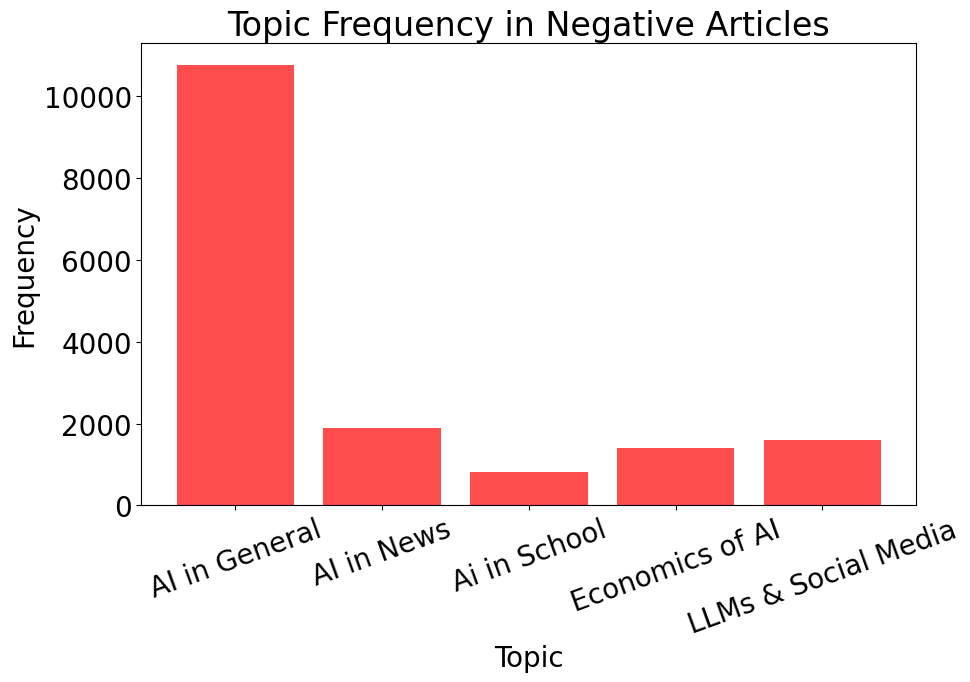

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(len(topic_frequencies)), topic_frequencies, color='red', alpha=0.7)

ax.set_title('Topic Frequency in Negative Articles')
ax.set_xlabel('Topic')
ax.set_ylabel('Frequency')

plt.rcParams.update({'font.size': 20})

plt.xticks(range(5), custom_labels)
plt.xticks(rotation=20)

plt.show()

In [ ]:
topics_pos = lda_model_positive_use.show_topics(num_topics=num_topics)
topics_pos

[(0,
  '0.011*"machine learning" + 0.005*"artificial intelligence" + 0.005*"data science" + 0.002*"computer vision" + 0.002*"data scientists" + 0.002*"big data" + 0.002*"data analytics" + 0.002*"deep learning" + 0.002*"digital transformation" + 0.001*"ai models"'),
 (1,
  '0.006*"artificial intelligence" + 0.002*"breaking news" + 0.002*"per cent" + 0.001*"ai technology" + 0.001*"use ai" + 0.001*"news alerts" + 0.001*"customer service" + 0.001*"last year" + 0.001*"newsletters breaking" + 0.001*"commentary newsletters"'),
 (2,
  '0.008*"artificial intelligence" + 0.003*"machine learning" + 0.002*"ai systems" + 0.002*"privacy policy" + 0.002*"can not" + 0.001*"facial recognition" + 0.001*"use ai" + 0.001*"ai system" + 0.001*"deep learning" + 0.001*"neural network"'),
 (3,
  '0.013*"artificial intelligence" + 0.008*"intelligence ai" + 0.003*"forwardlooking statements" + 0.002*"global artificial" + 0.002*"market research" + 0.001*"market report" + 0.001*"market share" + 0.001*"ai market" + 

In [ ]:
import matplotlib.pyplot as plt

filtered_topics = [1]

custom_labels = ['AI in General', 'AI tools', 'AI in Market Analysis', 'LLMs',
               'AI in Finance', 'AI in Insurance']

topic_frequencies = [
    sum(1 for doc in corpus if lda_model_positive_use.get_document_topics(doc)[0][0] == topic_id)
    for topic_id in range(7) if topic_id not in filtered_topics
]

len(topic_frequencies)

6

In [ ]:
topic_frequencies

[74410, 4560, 1088, 1789, 2937, 419]

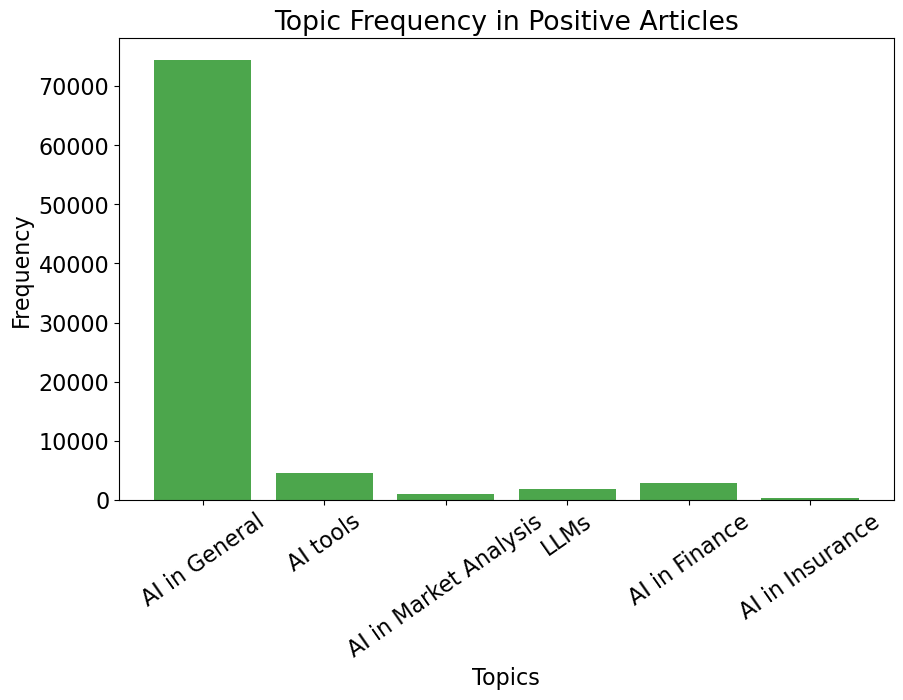

In [ ]:
# Plot the frequencies
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(len(topic_frequencies)), topic_frequencies, color='green', alpha=0.7)

ax.set_title('Topic Frequency in Positive Articles')
ax.set_xlabel('Topics')
ax.set_ylabel('Frequency')

plt.rcParams.update({'font.size': 20})
plt.xticks(range(0,6), custom_labels)
plt.xticks(rotation=35)

plt.show()